In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('BTC-USD.csv')

In [3]:
df.tail()

,Date,Open
359,8/24/2019,10410.49023
360,8/25/2019,10150.07031
361,8/26/2019,10141.75000
362,8/27/2019,10364.91016
363,8/28/2019,10175.46973


In [5]:
df.columns=['Day','Open' ]

In [6]:
df.head()

,Day,Open
0,8/30/2018,7051.609863
1,8/31/2018,6998.759766
2,9/1/2018,7026.959961
3,9/2/2018,7203.459961
4,9/3/2018,7301.250000


In [7]:
df['Day']=pd.to_datetime(df['Day'])

In [8]:
df.head()

,Day,Open
0,2018-08-30,7051.609863
1,2018-08-31,6998.759766
2,2018-09-01,7026.959961
3,2018-09-02,7203.459961
4,2018-09-03,7301.250000


In [9]:
df.set_index('Day',inplace=True)

In [10]:
df.head()

,Open
Day,
2018-08-30,7051.609863
2018-08-31,6998.759766
2018-09-01,7026.959961
2018-09-02,7203.459961
2018-09-03,7301.250000


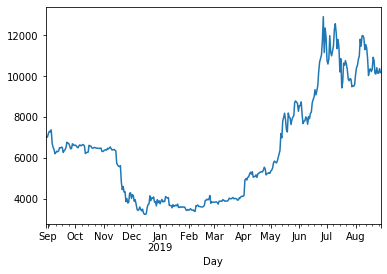

In [11]:
df['Open'].plot()

In [12]:
model=sm.tsa.statespace.SARIMAX(df['Open'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\eiman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [13]:
df['forecast']=results.predict(start=359,end=363,dynamic=True)
accuracy = (df['Open']-df['forecast']).mean()
df[['Open','forecast']].plot(figsize=(12,8))

KeyError: 'forecast'

In [15]:
print(df)

Open      forecast
Day                                   
2018-08-30   7051.609863           NaN
2018-08-31   6998.759766           NaN
2018-09-01   7026.959961           NaN
2018-09-02   7203.459961           NaN
2018-09-03   7301.250000           NaN
2018-09-04   7270.049805           NaN
2018-09-05   7369.890137           NaN
2018-09-06   6705.060059           NaN
2018-09-07   6515.419922           NaN
2018-09-08   6413.120117           NaN
2018-09-09   6200.229980           NaN
2018-09-10   6249.069824           NaN
2018-09-11   6324.430176           NaN
2018-09-12   6295.540039           NaN
2018-09-13   6337.080078           NaN
2018-09-14   6492.169922           NaN
2018-09-15   6485.390137           NaN
2018-09-16   6522.680176           NaN
2018-09-17   6502.439941           NaN
2018-09-18   6261.330078           NaN
2018-09-19   6346.439941           NaN
2018-09-20   6398.830078           NaN
2018-09-21   6505.970215           NaN
2018-09-22   6762.069824           NaN
2018-0